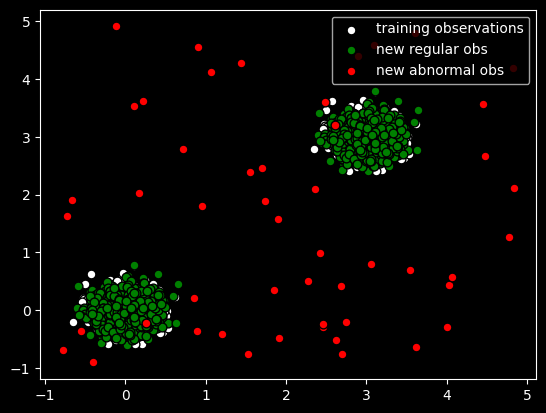

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
plt.style.use(['dark_background'])

rng = np.random.RandomState(42)
X_train = 0.2*rng.randn(1000,2)
X_train = np.r_[X_train+3,X_train]
X_train = pd.DataFrame(X_train, columns=['x1','x2'])

X_test = 0.2*rng.randn(1000,2)
X_test = np.r_[X_test+3,X_test]
X_test = pd.DataFrame(X_test, columns=['x1','x2'])

X_outliers = rng.uniform(low=-1, high=5, size=(50,2))
X_outliers = pd.DataFrame(X_outliers, columns=['x1','x2'])

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',s=20*2,edgecolors='k',label='training observations')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green',s=20*2,edgecolors='k',label='new regular obs')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',s=20*2,edgecolors='k',label='new abnormal obs')

plt.legend()


/Users/foxyhyun/opt/anaconda3/envs/cook/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


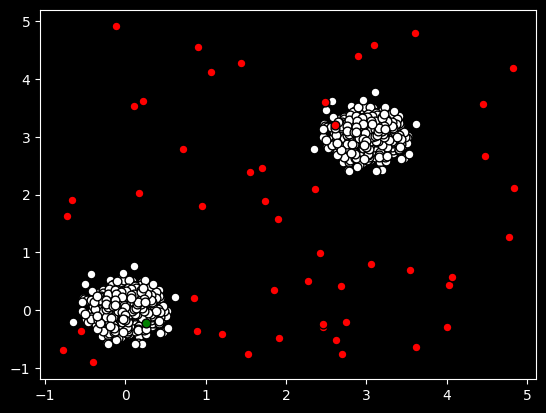

In [10]:
clf = IsolationForest(max_samples=100, contamination=0.1, random_state=42)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)


X_outliers = X_outliers.assign(y=y_pred_outliers)
p1 = plt.scatter(X_train.x1, X_train.x2, c='white',s=20*2,edgecolors='k',label='Training observations')
p2 = plt.scatter(X_outliers.loc[X_outliers.y==-1,['x1']],
                 X_outliers.loc[X_outliers.y==-1,['x2']],c='red',s=20*2,edgecolors='k',label='detected outliers')
p3 = plt.scatter(X_outliers.loc[X_outliers.y==1,['x1']],
                 X_outliers.loc[X_outliers.y==1,['x2']],c='green',s=20*2,edgecolors='k',label='detected regular obs')

In [13]:
print("TestSet Accuracy : ",list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데이터셋에서 Accuracy : ",list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

TestSet Accuracy :  0.8975
이상치 데이터셋에서 Accuracy :  0.98
